Source: https://www.kaggle.com/datasets/rtatman/chocolate-bar-ratings

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv(r'flavors_of_cacao.csv')

In [89]:
df.isnull().sum()

Makers               0
Bean_Origin          0
Cocoa_Percentage     0
Company_Location     0
Rating               0
Broad_Bean_Origin    0
dtype: int64

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
df.rename(columns={'Broad Bean\nOrigin': 'Broad_Bean_Origin'}, inplace=True)
df.rename(columns={"Company '\n'(Maker-if known)": 'Maker'}, inplace=True)
df.rename(columns={'Specific Bean Origin\nor Bar Name': 'Bean Origin'}, inplace=True)
df.rename(columns={'Cocoa\nPercent': 'CocoaPercentage'}, inplace=True)

In [5]:
df.head()

,Company \n(Maker-if known),Bean Origin,REF,Review\nDate,CocoaPercentage,Company\nLocation,Rating,Bean\nType,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
df.columns = df.columns.str.replace('\n', ' ')

In [7]:
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace('-', '')

In [8]:
df.head()

,Company Makerif known,Bean Origin,REF,Review Date,CocoaPercentage,Company Location,Rating,Bean Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [9]:
df.rename(columns={'Company  Makerif known': 'Maker'}, inplace=True)
df.rename(columns={'Bean Origin': 'Bean_Origin'}, inplace=True)
df.rename(columns={'CocoaPercentage': 'Cocoa_Percentage'}, inplace=True)
df.rename(columns={'Company Location': 'Company_Location'}, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company  Makerif known  1795 non-null   object 
 1   Bean_Origin             1795 non-null   object 
 2   REF                     1795 non-null   int64  
 3   Review Date             1795 non-null   int64  
 4   Cocoa_Percentage        1795 non-null   object 
 5   Company_Location        1795 non-null   object 
 6   Rating                  1795 non-null   float64
 7   Bean Type               1794 non-null   object 
 8   Broad_Bean_Origin       1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [11]:
df.head()

,Company Makerif known,Bean_Origin,REF,Review Date,Cocoa_Percentage,Company_Location,Rating,Bean Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [12]:
df.columns

Index(['Company  Makerif known', 'Bean_Origin', 'REF', 'Review Date',
       'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean Type',
       'Broad_Bean_Origin'],
      dtype='object')

In [13]:
df = df.rename(columns={'Company  Makerif known': 'Maker'})

In [14]:
df.columns

Index(['Company  Makerif known', 'Bean_Origin', 'REF', 'Review Date',
       'Cocoa_Percentage', 'Company_Location', 'Rating', 'Bean Type',
       'Broad_Bean_Origin'],
      dtype='object')

In [15]:
df.filter(like='known', axis=1).columns

Index(['Company  Makerif known'], dtype='object')

In [16]:
columns_to_replace = df.filter(like='known', axis=1).columns
new_column_names = {col: 'Makers' for col in columns_to_replace}
df.rename(columns=new_column_names, inplace=True)

In [17]:
df=df.dropna()

In [18]:
df.head()

,Makers,Bean_Origin,REF,Review Date,Cocoa_Percentage,Company_Location,Rating,Bean Type,Broad_Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [19]:
df.isnull().sum()

Makers               0
Bean_Origin          0
REF                  0
Review Date          0
Cocoa_Percentage     0
Company_Location     0
Rating               0
Bean Type            0
Broad_Bean_Origin    0
dtype: int64

In [20]:
df=df.drop(columns=['Bean Type', 'REF', 'Review Date'])

In [21]:
df['Broad_Bean_Origin'].value_counts()

Broad_Bean_Origin
Venezuela                214
Ecuador                  193
Peru                     165
Madagascar               145
Dominican Republic       141
                        ... 
Nigeria                    1
Peru, Belize               1
Peru, Mad., Dom. Rep.      1
PNG, Vanuatu, Mad          1
Venezuela, Carribean       1
Name: count, Length: 99, dtype: int64

In [22]:
value_counts = df['Broad_Bean_Origin'].value_counts()
less_known_origins = value_counts[value_counts < 10].index
df['Broad_Bean_Origin'] = df['Broad_Bean_Origin'].apply(lambda x: 'Less Known' if x in less_known_origins else x)

In [23]:
df['Broad_Bean_Origin'].value_counts()

Broad_Bean_Origin
Venezuela             214
Ecuador               193
Less Known            168
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Costa Rica             38
Vietnam                38
Tanzania               34
Trinidad               33
Ghana                  33
Mexico                 30
Guatemala              28
Hawaii                 28
Domincan Republic      25
Jamaica                20
Grenada                19
Indonesia              16
Honduras               15
Cuba                   11
Congo                  10
Sao Tome               10
Name: count, dtype: int64

In [24]:
unique_items_bbo = df['Broad_Bean_Origin'].unique()
Broad_Bean_Origin_df = sorted(unique_items_bbo)
Broad_Bean_Origin_df= pd.DataFrame(Broad_Bean_Origin_df, columns=['Broad_Bean_Origin'])

In [25]:
Broad_Bean_Origin_df.head()

,Broad_Bean_Origin
0,Belize
1,Bolivia
2,Brazil
3,Colombia
4,Congo


In [26]:
df['Makers'].value_counts()

Makers
Soma                 46
Bonnat               27
Fresco               26
Pralus               25
A. Morin             23
                     ..
Chocablog             1
Marigold's Finest     1
Chloe Chocolat        1
Chequessett           1
Ki' Xocolatl          1
Name: count, Length: 416, dtype: int64

In [27]:
df['Bean_Origin'].value_counts()

Bean_Origin
Madagascar                        56
Peru                              45
Ecuador                           42
Dominican Republic                37
Venezuela                         21
                                  ..
Conacado, #213, DR, -C             1
Sambirano Valley, #215, MR, MC     1
Chuao, #218, MR, MC                1
Chuao, #217, DR, MC                1
Brazil, Mitzi Blue                 1
Name: count, Length: 1038, dtype: int64

In [28]:
df['Broad_Bean_Origin'].value_counts()

Broad_Bean_Origin
Venezuela             214
Ecuador               193
Less Known            168
Peru                  165
Madagascar            145
Dominican Republic    141
                       73
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Papua New Guinea       42
Colombia               40
Costa Rica             38
Vietnam                38
Tanzania               34
Trinidad               33
Ghana                  33
Mexico                 30
Guatemala              28
Hawaii                 28
Domincan Republic      25
Jamaica                20
Grenada                19
Indonesia              16
Honduras               15
Cuba                   11
Congo                  10
Sao Tome               10
Name: count, dtype: int64

In [29]:
df['Company_Location'].value_counts()

Company_Location
U.S.A.               763
France               156
Canada               124
U.K.                  96
Italy                 63
Ecuador               54
Australia             49
Belgium               40
Switzerland           38
Germany               35
Austria               26
Spain                 25
Colombia              23
Hungary               22
Venezuela             20
Japan                 17
Brazil                17
Peru                  17
Madagascar            17
New Zealand           17
Denmark               15
Vietnam               11
Scotland              10
Guatemala             10
Israel                 9
Costa Rica             9
Argentina              9
Poland                 8
Lithuania              6
Honduras               6
South Korea            5
Nicaragua              5
Sweden                 5
Domincan Republic      5
Ireland                4
Netherlands            4
Fiji                   4
Sao Tome               4
Puerto Rico            4
Mexico  

In [30]:
df.isnull().sum()

Makers               0
Bean_Origin          0
Cocoa_Percentage     0
Company_Location     0
Rating               0
Broad_Bean_Origin    0
dtype: int64

In [31]:
df.head()

,Makers,Bean_Origin,Cocoa_Percentage,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,Less Known
2,A. Morin,Atsane,70%,France,3.00,Less Known
3,A. Morin,Akata,70%,France,3.50,Less Known
4,A. Morin,Quilla,70%,France,3.50,Peru


'Makers', 'Broad_Bean_Origin', 'Bean_Origin', 'Company_Location'

In [32]:
unique_items_m = df['Makers'].unique()
Makers_df = sorted(unique_items_m)
Makers_df= pd.DataFrame(Makers_df, columns=['Makers'])

In [33]:
unique_items_bo = df['Bean_Origin'].unique()
Bean_Origin_df = sorted(unique_items_bo)
Bean_Origin_df= pd.DataFrame(Bean_Origin_df, columns=['Bean_Origin'])

In [80]:
Bean_Origin_df

,Bean_Origin
0,"""heirloom"", Arriba Nacional"
1,100 percent
2,2009 Hapa Nibby
3,"A case of the Xerces Blues, triple roast"
4,ABOCFA Coop
...,...
1033,black label
1034,la Amistad
1035,one hundred
1036,single estate


In [34]:
unique_items_cl = df['Company_Location'].unique()
Company_Location_df = sorted(unique_items_cl)
Company_Location_df= pd.DataFrame(Company_Location_df, columns=['Company_Location'])

In [38]:
df.columns

Index(['Makers', 'Bean_Origin', 'Cocoa_Percentage', 'Company_Location',
       'Rating', 'Broad_Bean_Origin'],
      dtype='object')

In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
encoder = OrdinalEncoder()

In [41]:
encoded_data = encoder.fit_transform(df[['Makers', 'Bean_Origin', 'Company_Location', 'Broad_Bean_Origin']])

In [42]:
encoded_df = pd.DataFrame(encoded_data, columns=['Makers', 'Bean_Origin', 'Company_Location', 'Broad_Bean_Origin'])

In [44]:
encoded_df.head()

,Makers,Bean_Origin,Company_Location,Broad_Bean_Origin
0,0.0,14.0,18.0,23.0
1,0.0,492.0,18.0,17.0
2,0.0,67.0,18.0,17.0
3,0.0,15.0,18.0,17.0
4,0.0,809.0,18.0,22.0


In [45]:
df.head()

,Makers,Bean_Origin,Cocoa_Percentage,Company_Location,Rating,Broad_Bean_Origin
0,A. Morin,Agua Grande,63%,France,3.75,Sao Tome
1,A. Morin,Kpime,70%,France,2.75,Less Known
2,A. Morin,Atsane,70%,France,3.00,Less Known
3,A. Morin,Akata,70%,France,3.50,Less Known
4,A. Morin,Quilla,70%,France,3.50,Peru


In [67]:
result_df = pd.concat([encoded_df, df['Cocoa_Percentage']], axis=1)

In [68]:
result_df

,Makers,Bean_Origin,Company_Location,Broad_Bean_Origin,Cocoa_Percentage
0,0.0,14.0,18.0,23.0,63%
1,0.0,492.0,18.0,17.0,70%
2,0.0,67.0,18.0,17.0,70%
3,0.0,15.0,18.0,17.0,70%
4,0.0,809.0,18.0,22.0,70%
...,...,...,...,...,...
1790,410.0,483.0,3.0,17.0,70%
1791,410.0,483.0,3.0,17.0,65%
1792,410.0,137.0,3.0,2.0,65%
1793,NaN,NaN,NaN,NaN,62%


In [69]:
result_df = pd.concat([result_df, df['Rating']], axis=1)

In [70]:
result_df.head()

,Makers,Bean_Origin,Company_Location,Broad_Bean_Origin,Cocoa_Percentage,Rating
0,0.0,14.0,18.0,23.0,63%,3.75
1,0.0,492.0,18.0,17.0,70%,2.75
2,0.0,67.0,18.0,17.0,70%,3.00
3,0.0,15.0,18.0,17.0,70%,3.50
4,0.0,809.0,18.0,22.0,70%,3.50


In [71]:
result_df['Cocoa_Percentage'] = result_df['Cocoa_Percentage'].str.rstrip('%').astype(float) / 100

In [72]:
result_df.head()

,Makers,Bean_Origin,Company_Location,Broad_Bean_Origin,Cocoa_Percentage,Rating
0,0.0,14.0,18.0,23.0,0.63,3.75
1,0.0,492.0,18.0,17.0,0.70,2.75
2,0.0,67.0,18.0,17.0,0.70,3.00
3,0.0,15.0,18.0,17.0,0.70,3.50
4,0.0,809.0,18.0,22.0,0.70,3.50


array([[<Axes: title={'center': 'Makers'}>,
        <Axes: title={'center': 'Bean_Origin'}>],
       [<Axes: title={'center': 'Company_Location'}>,
        <Axes: title={'center': 'Broad_Bean_Origin'}>],
       [<Axes: title={'center': 'Cocoa_Percentage'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

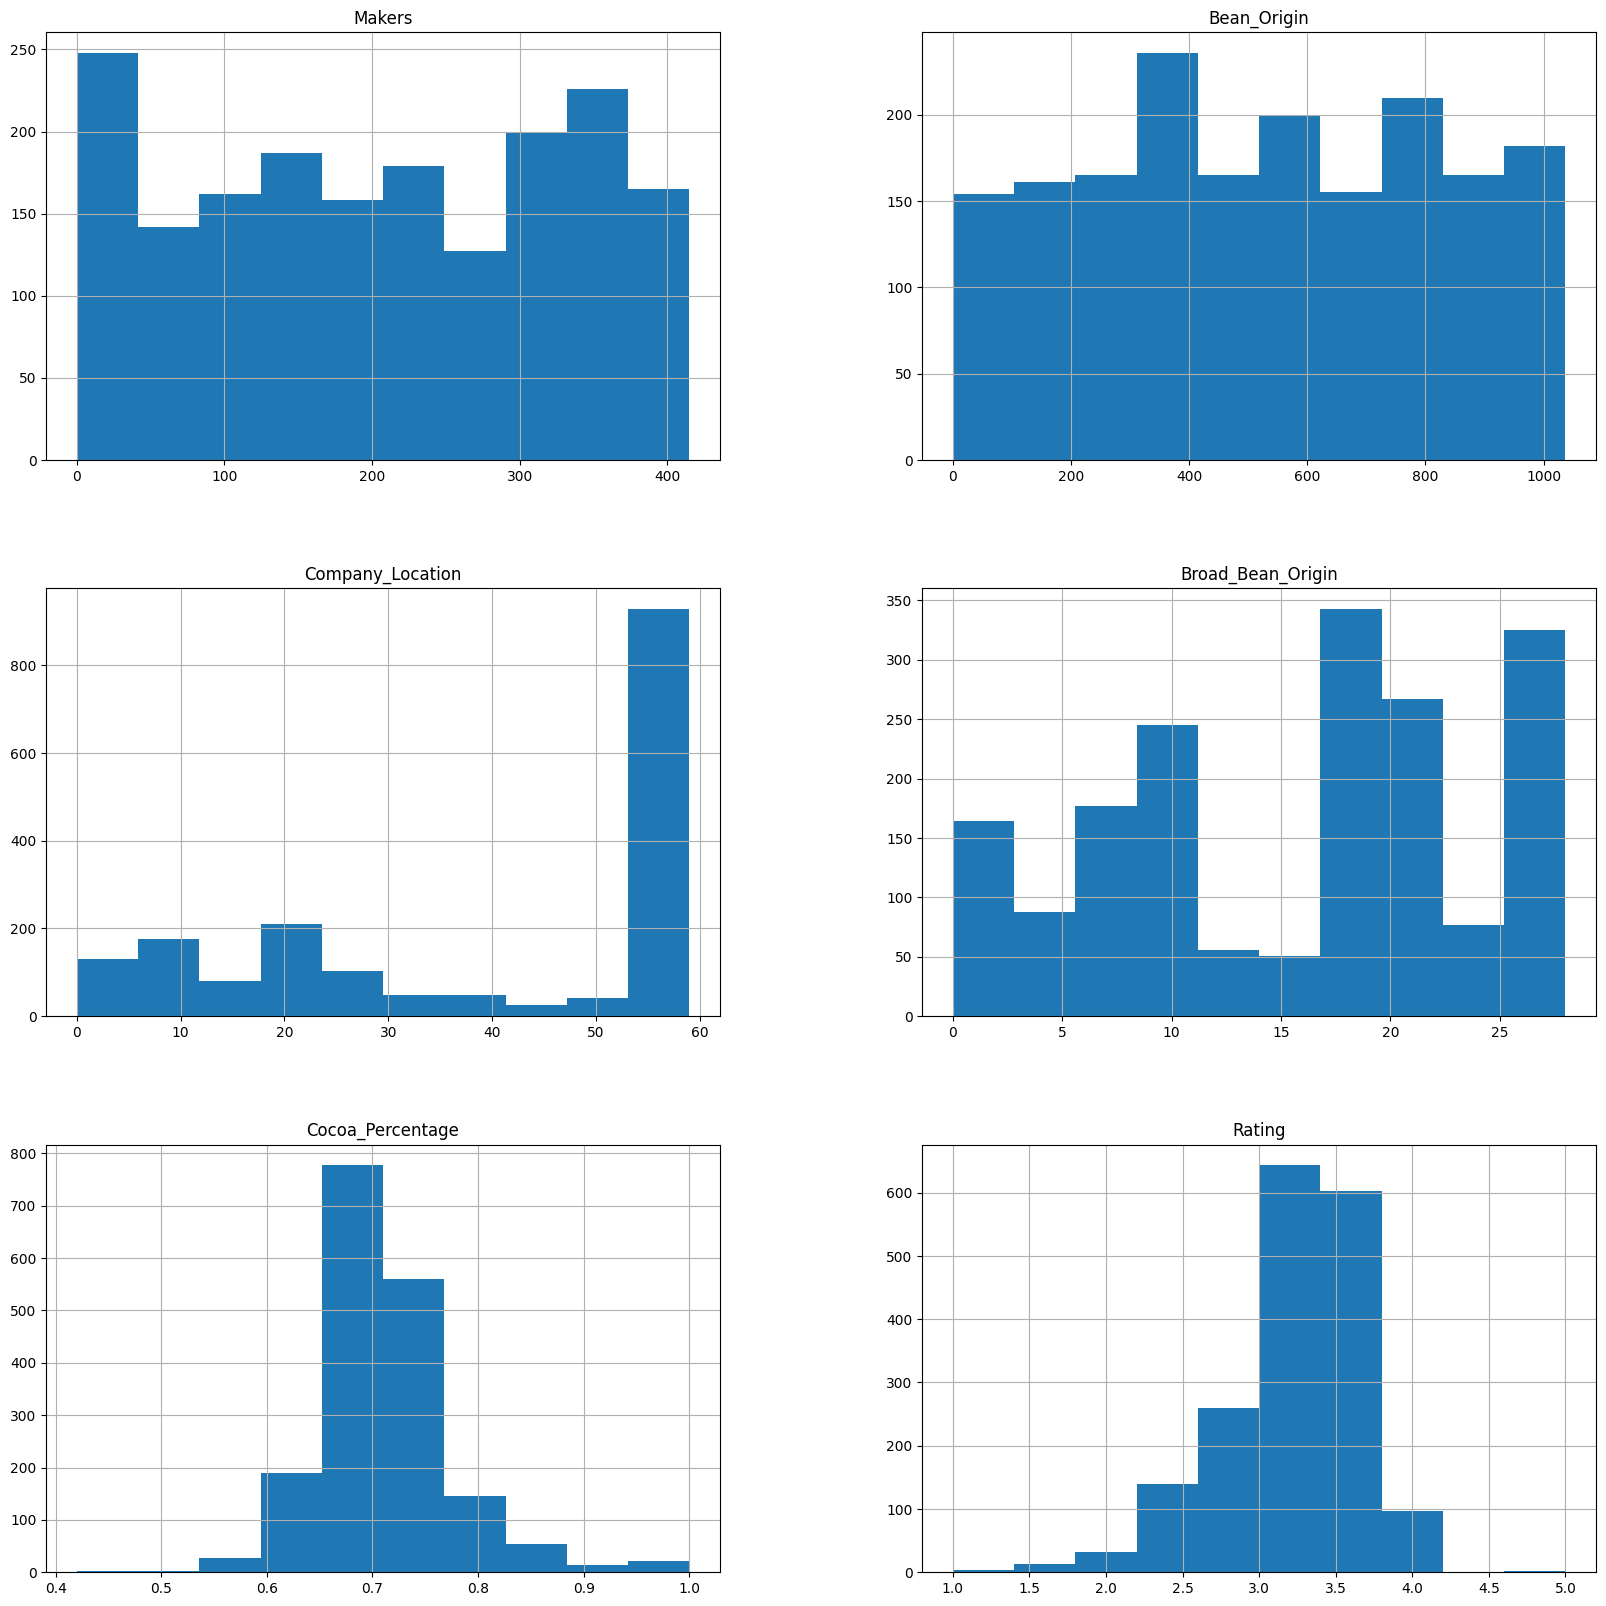

In [73]:
result_df.hist(figsize=(20,20))

In [74]:
df_corr = result_df.corr()

In [75]:
import matplotlib.pyplot as plt

In [81]:
mask = ~((df_corr > 0.05) | (df_corr< -0.05))

<Axes: >

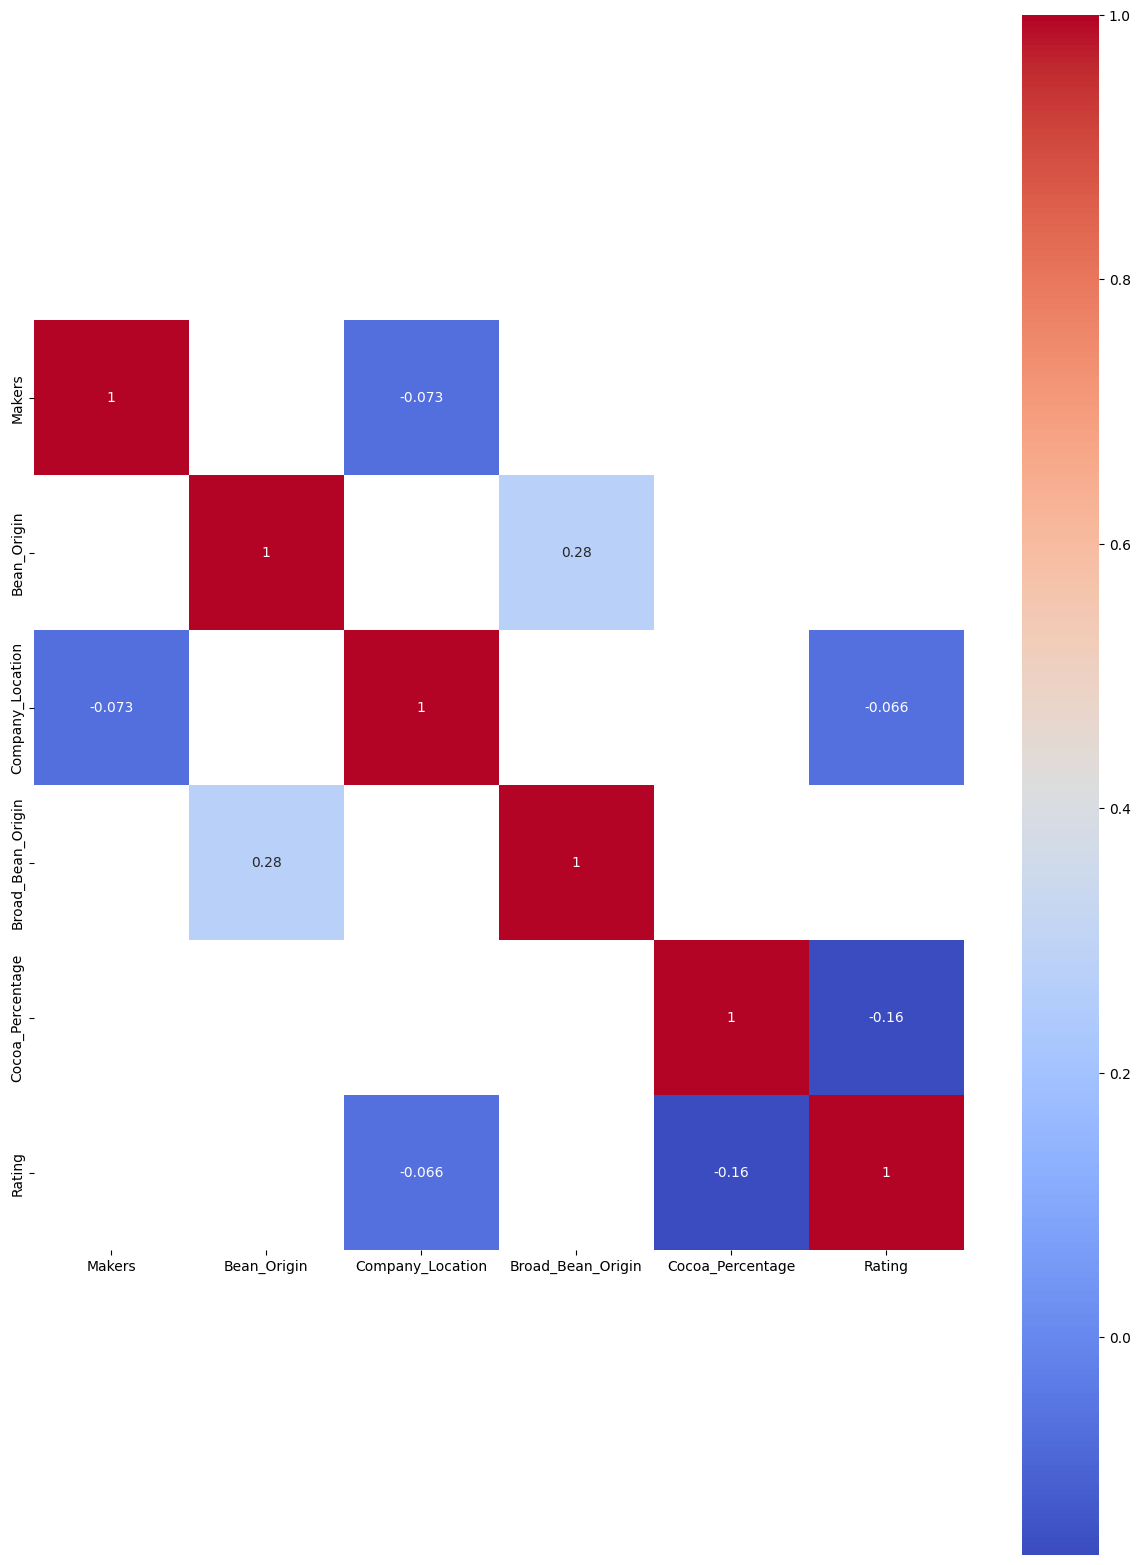

In [82]:
plt.figure(figsize=(15,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, mask=mask)

In [83]:
result_df.columns

Index(['Makers', 'Bean_Origin', 'Company_Location', 'Broad_Bean_Origin',
       'Cocoa_Percentage', 'Rating'],
      dtype='object')

In [79]:
result_df.head()

,Makers,Bean_Origin,Company_Location,Broad_Bean_Origin,Cocoa_Percentage,Rating
0,0.0,14.0,18.0,23.0,0.63,3.75
1,0.0,492.0,18.0,17.0,0.70,2.75
2,0.0,67.0,18.0,17.0,0.70,3.00
3,0.0,15.0,18.0,17.0,0.70,3.50
4,0.0,809.0,18.0,22.0,0.70,3.50


In [92]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer

In [85]:
#poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [90]:
columns = ['Makers', 'Broad_Bean_Origin', 'Company_Location']

In [93]:
imputer = SimpleImputer(strategy='mean')

In [94]:
result_df[columns] = imputer.fit_transform(result_df[columns])

In [95]:
poly = PolynomialFeatures()

In [96]:
interaction_terms = poly.fit_transform(result_df[columns])

In [99]:
interaction_df = pd.DataFrame(interaction_terms, columns=poly.get_feature_names_out(['Makers', 'Broad_Bean_Origin', 'Company_Location']))

In [109]:
result_df.columns

Index(['Makers', 'Bean_Origin', 'Company_Location', 'Broad_Bean_Origin',
       'Cocoa_Percentage', 'Rating'],
      dtype='object')

In [103]:
df_combined = pd.concat([result_df, interaction_df], axis=1)

In [104]:
print(df_combined)

          Makers  Bean_Origin  Company_Location  Broad_Bean_Origin  \
0       0.000000         14.0         18.000000          23.000000   
1       0.000000        492.0         18.000000          17.000000   
2       0.000000         67.0         18.000000          17.000000   
3       0.000000         15.0         18.000000          17.000000   
4       0.000000        809.0         18.000000          22.000000   
...          ...          ...               ...                ...   
1790  410.000000        483.0          3.000000          17.000000   
1791  410.000000        483.0          3.000000          17.000000   
1792  410.000000        137.0          3.000000           2.000000   
1793  206.153374          NaN         37.919688          15.555494   
1794  206.153374          NaN         37.919688          15.555494   

      Cocoa_Percentage  Rating    1      Makers  Broad_Bean_Origin  \
0                 0.63    3.75  1.0    0.000000          23.000000   
1                 0

In [111]:
df_corr = interaction_df.corr()

<Axes: >

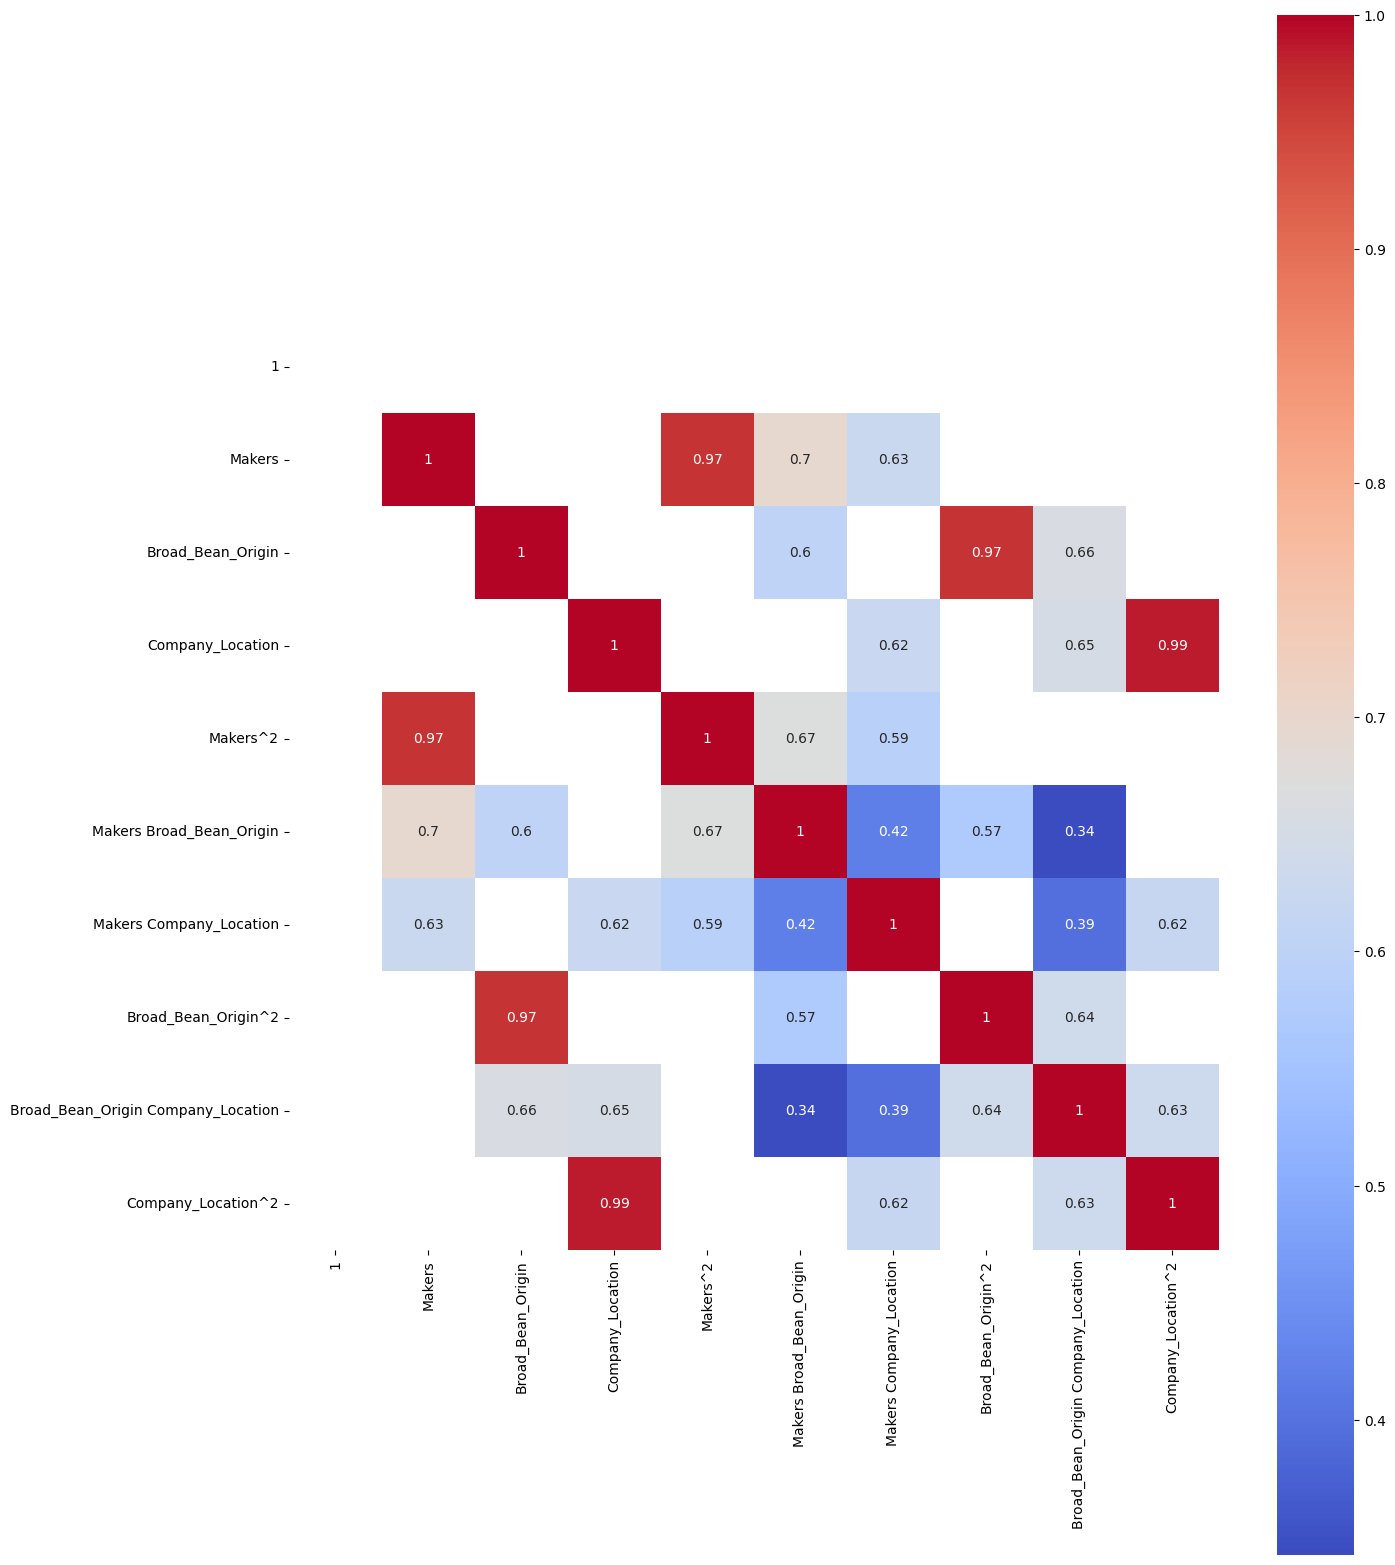

In [112]:
mask = ~((df_corr > 0.3) | (df_corr< -0.3))
plt.figure(figsize=(15,20))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', square=True, mask=mask)